In [16]:
#Imported neccessary dependancies
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import numpy as np

In [17]:
#Reading the csv's and creating the dataframes
csv_path_1 = "../Resources/AverageFare_Q2_2019.csv"
csv_path_2 = "../Resources/AverageFare_Q2_2020.csv"

df_2019 = pd.read_csv(csv_path_1)
df_2020 = pd.read_csv(csv_path_2)

In [18]:
#Reworking and cleaning data
df_19 = df_2019.dropna()
df_20 = df_2020.dropna()

df_9 = df_19.drop(columns=['Airport Name','2019 Passenger Rank','State Name'])
df_0 = df_20.drop(columns=['Airport Name','2019 Passenger Rank','State Name'])

clean_19 = df_9.rename(columns={'Average Fare ($)' : 'Average Fare 2019'})
clean_20 = df_0.rename(columns={'Average Fare ($)' : 'Average Fare 2020'})

In [19]:
clean_19.drop(clean_19.tail(405).index, inplace=True)
clean_20.drop(clean_20.tail(389).index, inplace=True)

In [20]:
fare_2020 = clean_20["Average Fare 2020"]
fare_2019 = clean_19["Average Fare 2019"]
df = clean_19.join(fare_2020)

In [22]:
#Adding a new column for later analtical purposes
perc_change = (((fare_2020 - fare_2019)/fare_2019)*100)
perc_change
df['Percent Change'] = perc_change
df.head(20)

,Airport Code,City Name,Average Fare 2019,Average Fare 2020,Percent Change
0,LAX,Los Angeles,363.79,277.80,-23.637263
1,ORD,Chicago-O'Hare,346.87,247.57,-28.627440
2,DEN,Denver,300.04,233.31,-22.240368
3,ATL,Atlanta,374.83,262.61,-29.938906
4,BOS,Boston,345.78,254.58,-26.375152
5,SFO,San Francisco,404.31,312.37,-22.739977
6,SEA,Seattle,340.03,270.57,-20.427609
7,EWR,Newark,417.35,301.37,-27.789625
8,DFW,Dallas-DFW,408.04,287.32,-29.585335
9,JFK,New York-JFK,402.09,321.04,-20.157179


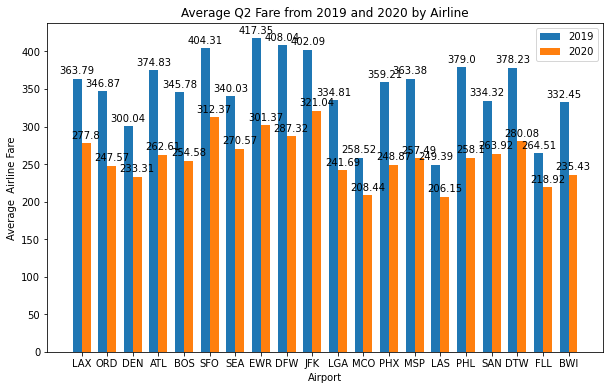

In [11]:
labels = df['Airport Code']
x = np.arange(len(labels))
width = 0.35

fig,ax = plt.subplots()
rects1 = ax.bar(x - width/2, df['Average Fare 2019'], width, label='2019')
rects2 = ax.bar(x + width/2, df['Average Fare 2020'], width, label='2020')

ax.set_ylabel('Average  Airline Fare')
ax.set_xlabel('Airport')
ax.set_title('Average Q2 Fare from 2019 and 2020 by Airline')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                   xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')
        

autolabel(rects1)
autolabel(rects2)

fig.tight_layout()
fig.set_size_inches(9,6)

#plt.savefig('Q2 average airfare')
plt.show()

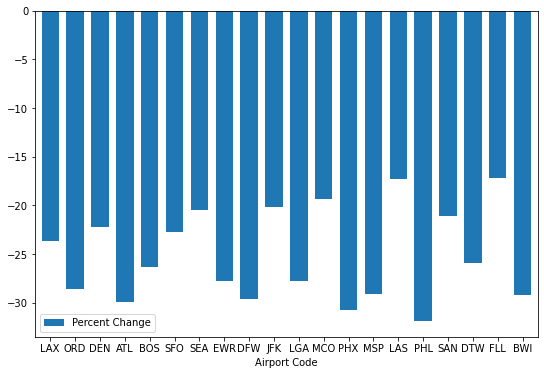

In [14]:
fig = df.plot.bar(x='Airport Code', y='Percent Change', width = 0.7, rot=0, figsize=(9,6))
ax.set_xlabel('Airport')
ax.set_ylabel('Percent Change')
ax.set_title('2nd Quarter Percent Change from 2019 to 2020')

for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

#plt.savefig('Q2 Percent Change')
plt.show()